In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import STOPWORDS
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from scipy.sparse import hstack, csr_matrix, vstack
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from itertools import cycle
from textblob import TextBlob
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import LinearSVC


from nltk.stem import WordNetLemmatizer
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/saurabhborsiwala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saurabhborsiwala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/saurabhborsiwala/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
# from google.colab import drive
# drive.mount("/drive", force_remount=True)

In [14]:
def loadDataset(filename):
  return pd.read_csv(filename)

In [15]:
df1 = loadDataset('data.csv')
df2 = loadDataset('train.csv')

In [16]:
df1

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804869,6333967,0.000000,"Maybe the tax on ""things"" would be collected w...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399385,approved,0,0,0,0,0,0.0,0,4
1804870,6333969,0.000000,What do you call people who STILL think the di...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399528,approved,0,0,0,0,0,0.0,0,4
1804871,6333982,0.000000,"thank you ,,,right or wrong,,, i am following ...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399457,approved,0,0,0,0,0,0.0,0,4
1804872,6334009,0.621212,Anyone who is quoted as having the following e...,0.030303,0.030303,0.045455,0.621212,0.0,NaN,NaN,...,399519,approved,0,0,0,0,0,0.0,0,66


In [17]:
df1 = df1[['comment_text', 'target']]

In [18]:
df1['label'] = np.where(df1['target'] >= 0.5, 1, 0)

/var/folders/60/3sy6jfdx3hl2p_wdhmxzvdfh0000gn/T/ipykernel_38486/1605557385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['label'] = np.where(df1['target'] >= 0.5, 1, 0)


In [19]:
df1

,comment_text,target,label
0,"This is so cool. It's like, 'would you want yo...",0.000000,0
1,Thank you!! This would make my life a lot less...,0.000000,0
2,This is such an urgent design problem; kudos t...,0.000000,0
3,Is this something I'll be able to install on m...,0.000000,0
4,haha you guys are a bunch of losers.,0.893617,1
...,...,...,...
1804869,"Maybe the tax on ""things"" would be collected w...",0.000000,0
1804870,What do you call people who STILL think the di...,0.000000,0
1804871,"thank you ,,,right or wrong,,, i am following ...",0.000000,0
1804872,Anyone who is quoted as having the following e...,0.621212,1


In [20]:
df1.shape

(1804874, 3)

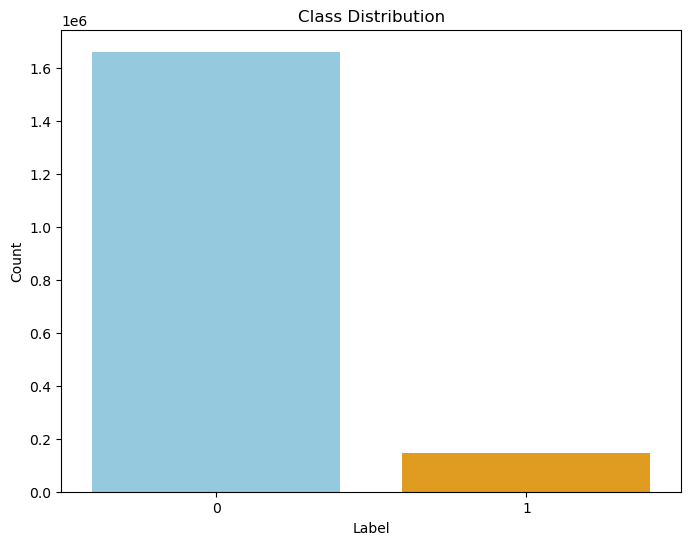

In [22]:
# Ensure keys in palette dictionary match the levels in the data
custom_palette = {0: "skyblue", 1: "orange"}  # Use integers instead of strings

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df1, palette=custom_palette)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


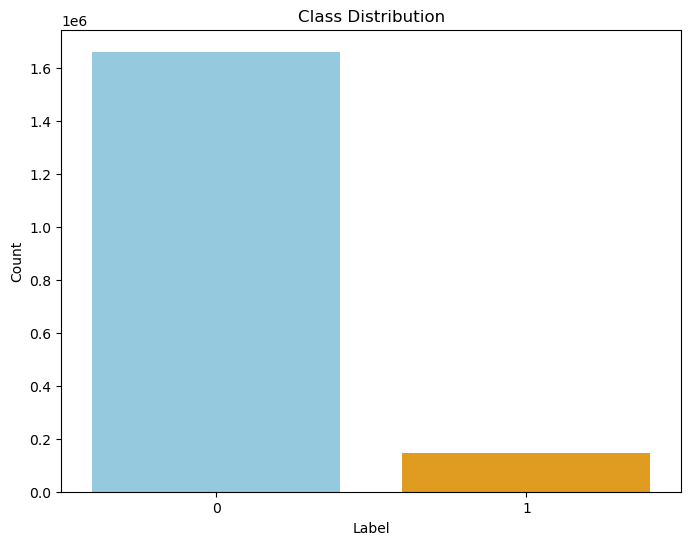

In [23]:
# Display class distribution of Dataset
custom_palette = {0: "skyblue",1: "orange"}
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df1, palette=custom_palette)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [24]:
#As there is a lot of difference in data counts for each label,
#We are randomly removing some positive comments to balance the data.
if df1['label'].eq(0).any():
    num_rows = len(df1)
    drop_percent = 0.8
    num_to_drop = int(drop_percent * num_rows)

    drop_indices = np.random.choice(df1[df1['label'] == 0].index, size=num_to_drop, replace=False)

    df1_dropped = df1.drop(index=drop_indices)

In [25]:
df1 = df1_dropped

In [26]:
df1

,comment_text,target,label
4,haha you guys are a bunch of losers.,0.893617,1
5,ur a sh*tty comment.,0.666667,1
13,It's ridiculous that these guys are being call...,0.600000,1
14,This story gets more ridiculous by the hour! A...,0.500000,1
19,"Angry trolls, misogynists and Racists"", oh my....",0.500000,1
...,...,...,...
1804851,So you think that we should have laws protecti...,0.000000,0
1804856,Believing in God or not believing in God are p...,0.500000,1
1804857,"I take your point, but I think you're shooting...",0.700000,1
1804868,"cont....GBA: ""here's the summation of that ""l...",0.000000,0


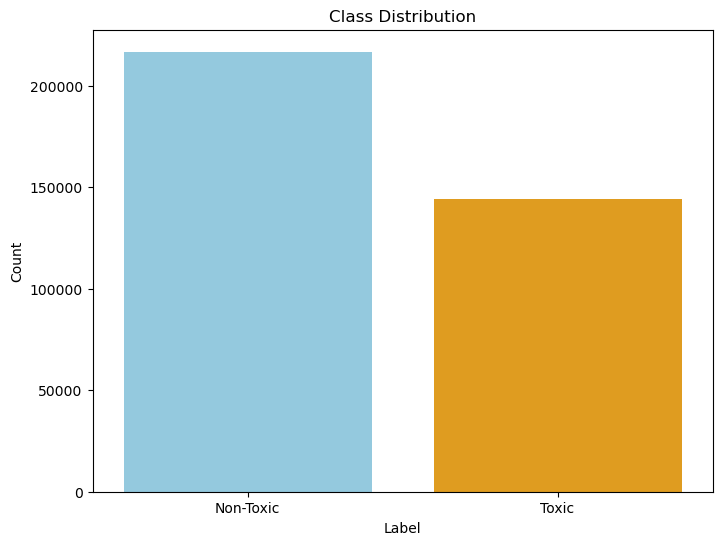

In [27]:
# Display class distribution of Dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df1, palette=custom_palette)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Toxic', 'Toxic'])
plt.show()

In [28]:
df2

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [29]:
df2['label'] = (df2[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) > 0).astype(int)

In [30]:
df2 = df2[['comment_text', 'label']]

In [31]:
df2

,comment_text,label
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
159566,""":::::And for the second time of asking, when ...",0
159567,You should be ashamed of yourself \n\nThat is ...,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,And it looks like it was actually you who put ...,0


In [32]:
# df['label'] = np.where(df['target'] >= 0.5, 1, 0)

In [33]:
df2.shape

(159571, 2)

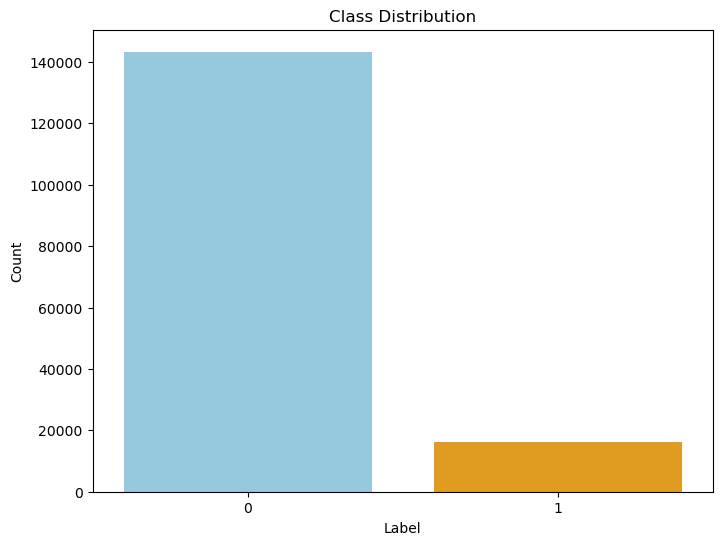

In [34]:
# Display class distribution of Dataset3
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df2, palette=custom_palette)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [35]:
#As there is a lot of difference in data counts for each label,
#We are randomly removing some positive comments to balance the data.
if df2['label'].eq(0).any():
    num_rows = len(df2)
    drop_percent = 0.7
    num_to_drop = int(drop_percent * num_rows)

    drop_indices = np.random.choice(df2[df2['label'] == 0].index, size=num_to_drop, replace=False)

    df2_dropped = df2.drop(index=drop_indices)

In [36]:
df2 = df2_dropped

In [37]:
df2

,comment_text,label
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,Your vandalism to the Matt Shirvington article...,0
8,Sorry if the word 'nonsense' was offensive to ...,0
12,Hey... what is it..\n@ | talk .\nWhat is it......,1
16,"Bye! \n\nDon't look, come or think of comming ...",1
...,...,...
159546,"""\n\nHey listen don't you ever!!!! Delete my e...",1
159550,i agree/ on another note lil wayne is a talent...,0
159554,and i'm going to keep posting the stuff u dele...,1
159560,"""Editing of article without Consensus & Remova...",0


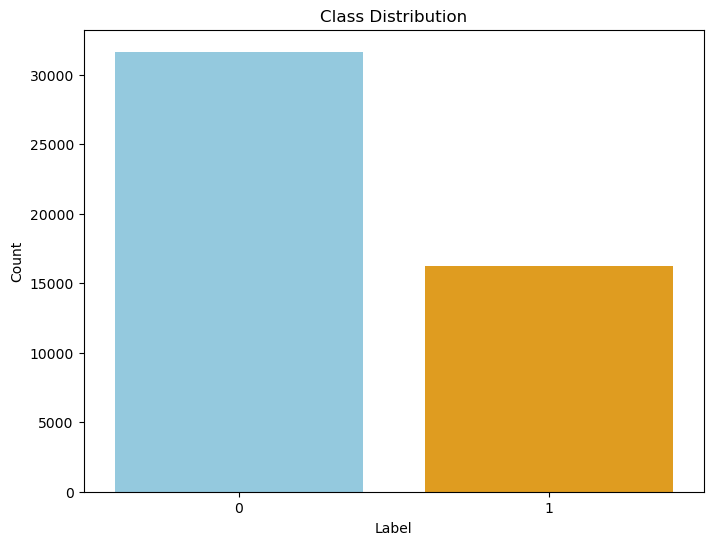

In [38]:
# Display class distribution of Dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df2, palette=custom_palette)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [39]:
df2.shape

(47872, 2)

# MERGE DATASETS:

In [40]:
df = pd.DataFrame() # Initialize an Empty Dataframe.
df_list = [df1, df2]
df = pd.concat(df_list, ignore_index=True)

In [41]:
df

,comment_text,target,label
0,haha you guys are a bunch of losers.,0.893617,1
1,ur a sh*tty comment.,0.666667,1
2,It's ridiculous that these guys are being call...,0.600000,1
3,This story gets more ridiculous by the hour! A...,0.500000,1
4,"Angry trolls, misogynists and Racists"", oh my....",0.500000,1
...,...,...,...
408842,"""\n\nHey listen don't you ever!!!! Delete my e...",NaN,1
408843,i agree/ on another note lil wayne is a talent...,NaN,0
408844,and i'm going to keep posting the stuff u dele...,NaN,1
408845,"""Editing of article without Consensus & Remova...",NaN,0


In [42]:
df.shape

(408847, 3)

In [43]:
## 1. Removal of punctuation and capitalization
## 2. Tokenizing
## 3. Removal of stopwords
## 4. Stemming
## 5. Lemmatization

stopwords = nltk.corpus.stopwords.words("english")
#extending the stopwords to include other words used in twitter such as retweet(rt) etc.
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stopwords = nltk.corpus.stopwords.words("english")
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text):

    # Convert to lowercase
    text_lower = text.str.lower()

    # Remove URLs
    text_no_url = text_lower.str.replace(r'http\S+|www\S+|https\S+', '', regex=True)

    # Remove user mentions
    text_no_mention = text_no_url.str.replace(r'@[\w_]+', '', regex=True)

    # Remove special characters, numbers, and punctuation
    text_no_special = text_no_mention.str.replace(r'\d+|[^a-zA-Z\s]', '', regex=True)

    # Replace multiple white spaces with a single space
    text_cleaned = text_no_special.str.replace(r'\s+', ' ', regex=True).str.strip()

    # Tokenize the tweet
    tokenized_text = text_cleaned.apply(lambda x: x.split() if isinstance(x, str) else [])

    # Remove stop words
    tokenized_text = tokenized_text.apply(lambda x: [item for item in x if item not in stopwords])

    # Stemming
    def apply_stemming(tokens):
        try:
            return [stemmer.stem(item) for item in tokens]
        except (AttributeError, RecursionError):
            return []

    # Apply stemming to each list of tokens
    tokenized_text = tokenized_text.apply(lambda x: apply_stemming(x) if isinstance(x, list) else [])

    #lemmatization
    tokenized_text = tokenized_text.apply(lambda x: [lemmatizer.lemmatize(item) for item in x])

    # Remove repeated words
    tokenized_text = tokenized_text.apply(lambda x: list(dict.fromkeys(x)))

    # for i in range(len(tokenized_text)):
    #     tokenized_text[i] = ' '.join(tokenized_text[i])
    #     cleaned_text= tokenized_text

    # Join tokens back into strings
    tokenized_text = tokenized_text.apply(lambda x: ' '.join(x) if isinstance(x, list) else '')
    cleaned_text= tokenized_text
    return cleaned_text

text=df["comment_text"]
processed_comments = preprocess(text)
df['processed_comment_text'] = processed_comments
print(df[["comment_text","processed_comment_text"]].head(10))

                                        comment_text  \
0               haha you guys are a bunch of losers.   
1                               ur a sh*tty comment.   
2  It's ridiculous that these guys are being call...   
3  This story gets more ridiculous by the hour! A...   
4  Angry trolls, misogynists and Racists", oh my....   
5  Yet call out all Muslims for the acts of a few...   
6  This bitch is nuts. Who would read a book by a...   
7                                 Very cool project!   
8  Mormons have had a complicated relationship wi...   
9  To anyone reading this article. That's me and ...   

                              processed_comment_text  
0                               haha guy bunch loser  
1                                   ur shtti comment  
2  ridicul guy call protest arm threat violenc ma...  
3  stori get ridicul hour love peopl send guy dil...  
4  angri troll misogynist racist oh doesnt take i...  
5  yet call muslim act get pillori okay smear ent... 

In [44]:
toxic_text = ' '.join(df['processed_comment_text'][df.label == 1])
non_toxic_text = ' '.join(df['processed_comment_text'][df.label == 0])
wordcloud_toxic = WordCloud(width=500, height=200, random_state=44, max_font_size=100, background_color = 'black').generate(toxic_text)
wordcloud_non_toxic = WordCloud(width=500, height=200, random_state=43, max_font_size=100, background_color = 'white').generate(non_toxic_text)

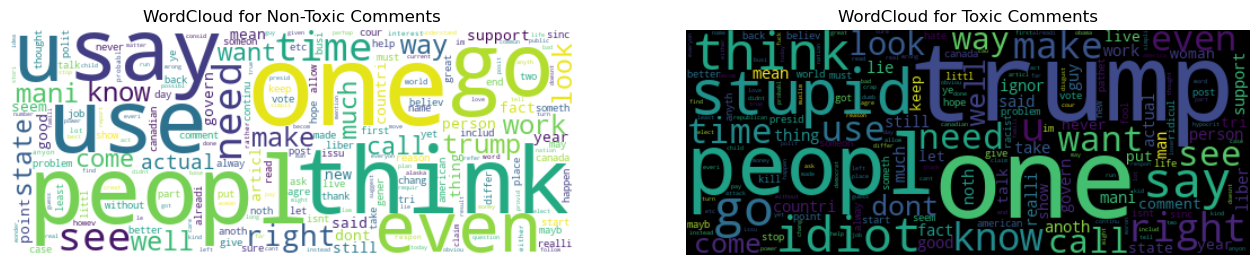

In [ ]:
fig, axs = plt.subplots(1,2 , figsize=(16,8))
axs[0].imshow(wordcloud_non_toxic, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('WordCloud for Non-Toxic Comments')
axs[1].imshow(wordcloud_toxic, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('WordCloud for Toxic Comments')
plt.show()

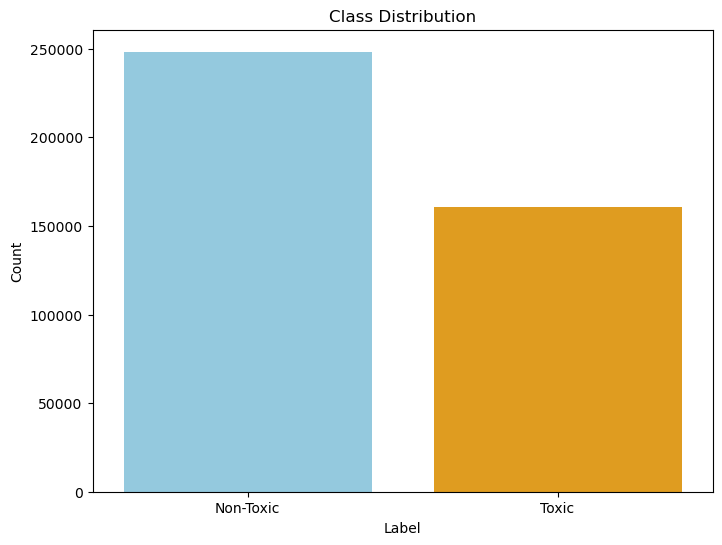

In [47]:
custom_palette = {0: "skyblue", 1: "orange"}
# Display class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df, palette=custom_palette)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Toxic', 'Toxic'])
plt.show()

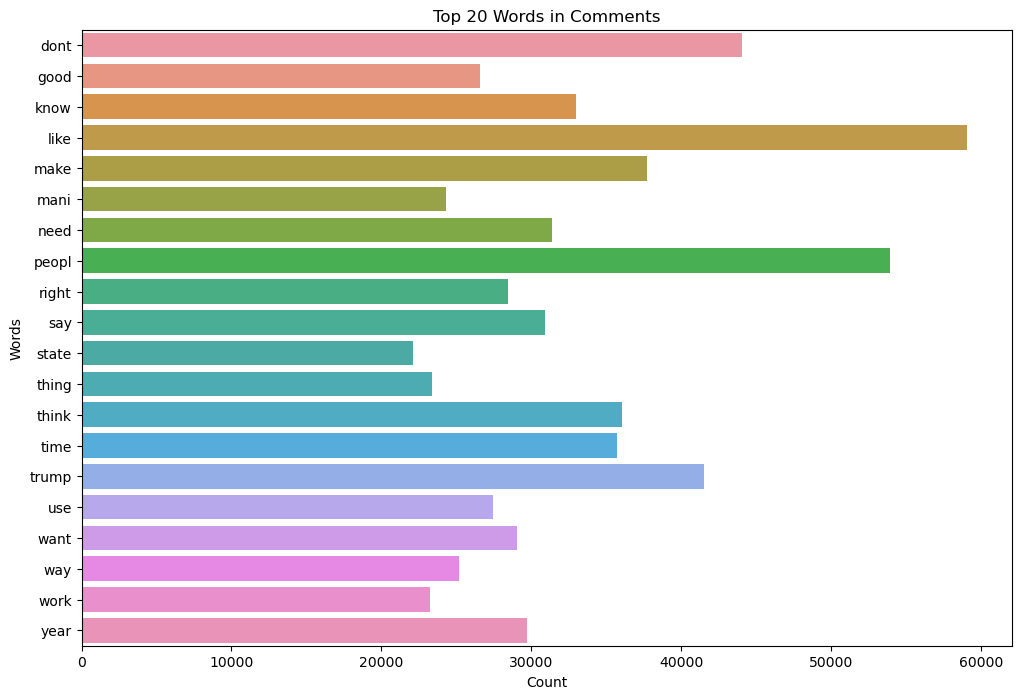

In [48]:
# Tokenize and count words in tweets and comments
vectorizer = CountVectorizer(stop_words='english', max_features=20)
word_counts = vectorizer.fit_transform(df['processed_comment_text'])

# Plot the top N words
plt.figure(figsize=(12, 8))
sns.barplot(x=word_counts.sum(axis=0).tolist()[0], y=vectorizer.get_feature_names_out())
plt.title('Top 20 Words in Comments')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

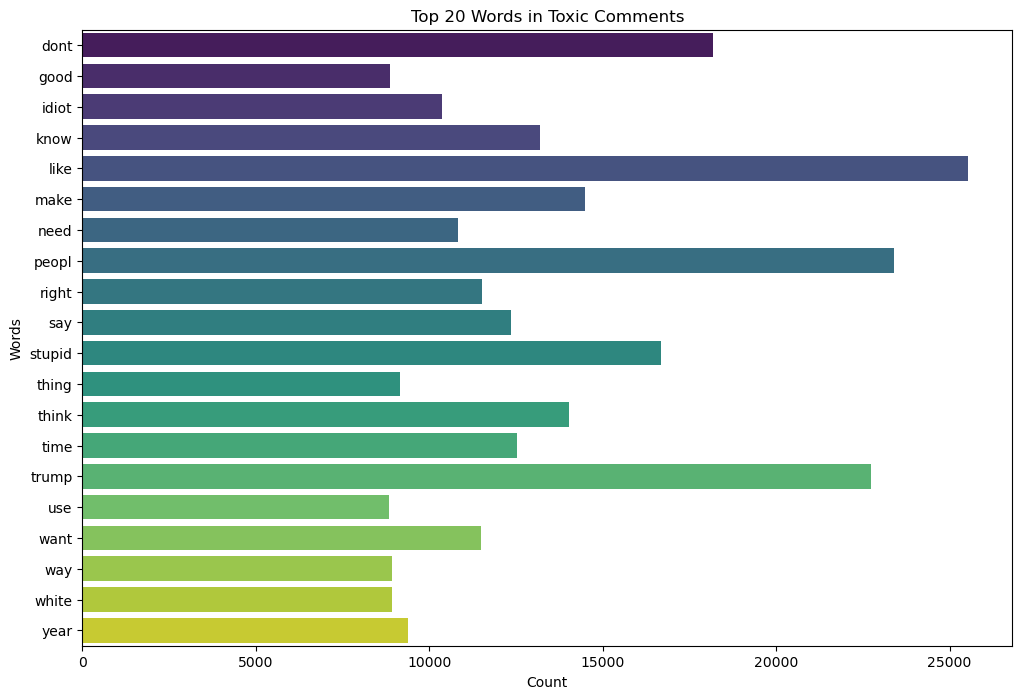

In [49]:
# Tokenize and count words in tweets and comments
vectorizer2 = CountVectorizer(stop_words='english', max_features=20)
toxic_word_counts = vectorizer2.fit_transform(df['processed_comment_text'][df.label == 1])
# Plot the top N words
plt.figure(figsize=(12, 8))
sns.barplot(x=toxic_word_counts.sum(axis=0).tolist()[0], y=vectorizer2.get_feature_names_out(), palette='viridis')
plt.title('Top 20 Words in Toxic Comments')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

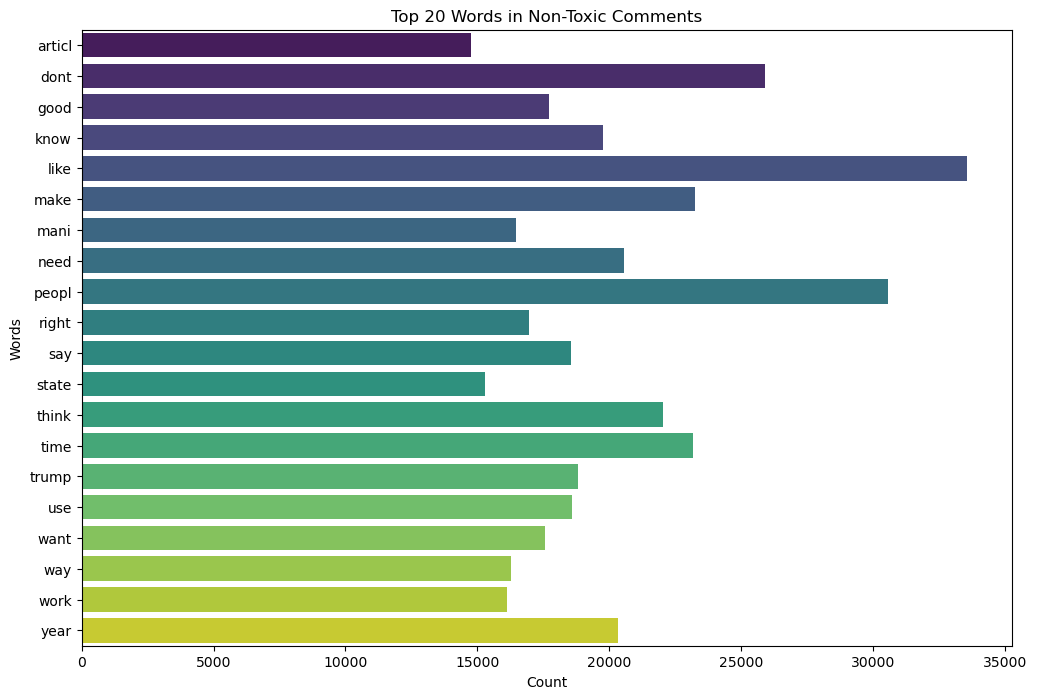

In [50]:
# Tokenize and count words in tweets and comments
vectorizer3 = CountVectorizer(stop_words='english', max_features=20)
non_toxic_word_counts = vectorizer2.fit_transform(df['processed_comment_text'][df.label == 0])
# Plot the top N words
plt.figure(figsize=(12, 8))
sns.barplot(x=non_toxic_word_counts.sum(axis=0).tolist()[0], y=vectorizer2.get_feature_names_out(), palette='viridis')
plt.title('Top 20 Words in Non-Toxic Comments')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

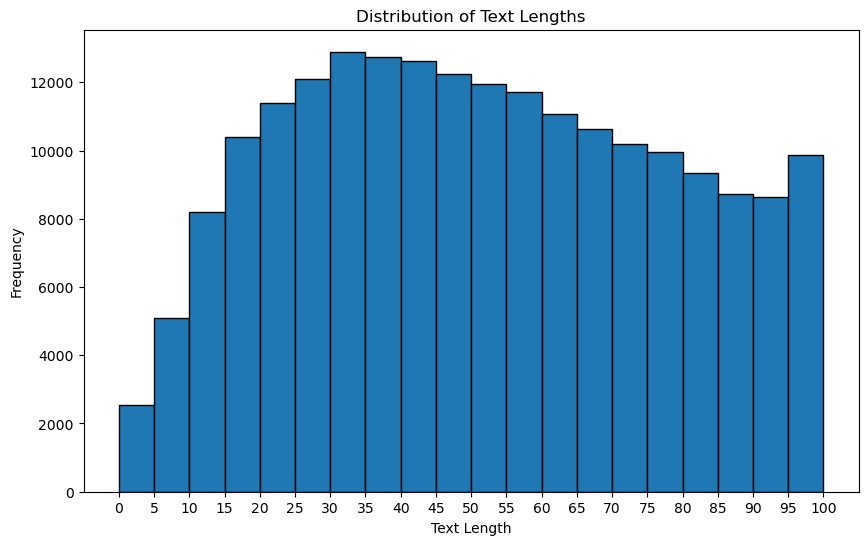

In [51]:
text_lengths = df['processed_comment_text'].apply(len)

# Define bin edges with intervals of 5, up to a maximum of 100
bin_edges = np.arange(0, 101, 5)

# Create a histogram with specified bins
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=bin_edges, edgecolor='black')

# Add labels and title
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Set x-axis ticks at bin edges
plt.xticks(bin_edges)

# Show the plot
plt.show()


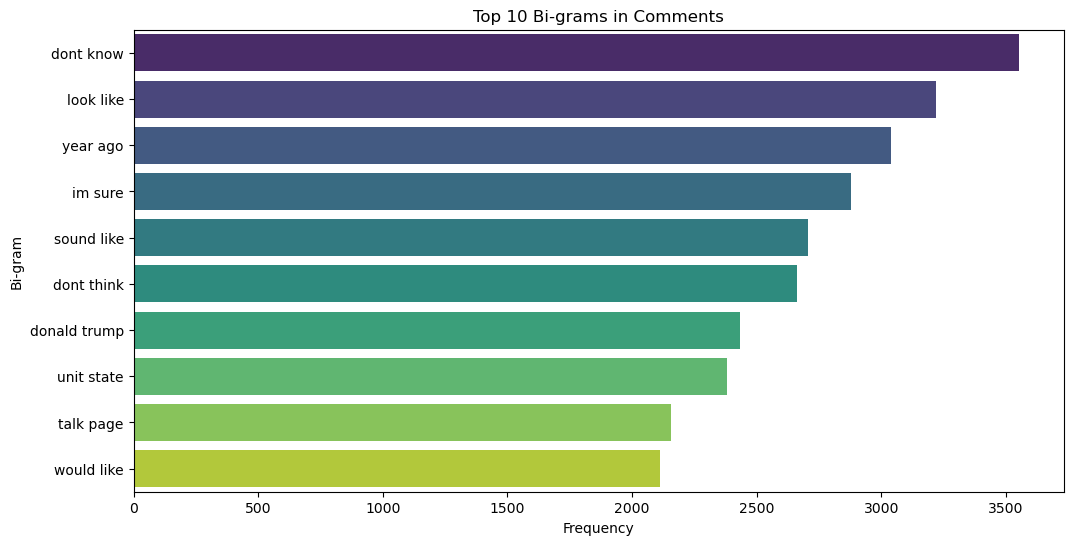

In [52]:
text_data = df['processed_comment_text']

# Create a CountVectorizer to identify bi-grams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bi_grams_matrix = vectorizer.fit_transform(text_data)

# Sum the occurrences of each bi-gram
bi_grams_sum = bi_grams_matrix.sum(axis=0)

# Get the feature names (bi-grams)
bi_gram_names = vectorizer.get_feature_names_out()

# Create a DataFrame to store bi-gram frequencies
bi_gram_df = pd.DataFrame(bi_grams_sum, columns=bi_gram_names).transpose()
bi_gram_df.columns = ['frequency']

# Sort the DataFrame by frequency to get the top 10 bi-grams
top_10_bi_grams = bi_gram_df.sort_values(by='frequency', ascending=False).head(10)

# Plot the top 10 bi-grams
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_bi_grams['frequency'], y=top_10_bi_grams.index, palette='viridis')
plt.title('Top 10 Bi-grams in Comments')
plt.xlabel('Frequency')
plt.ylabel('Bi-gram')
plt.show()


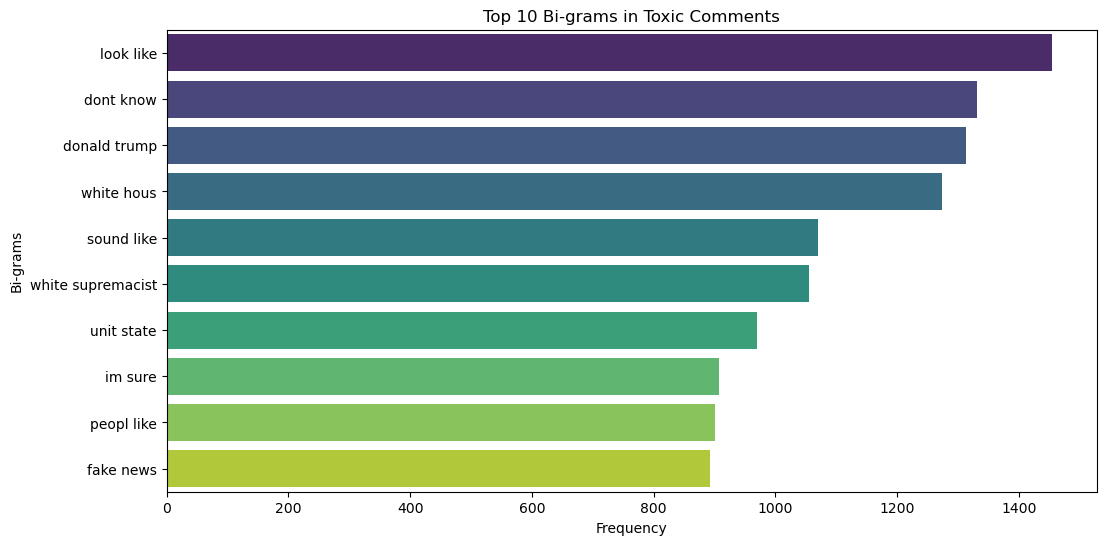

In [53]:
toxic_text_data = df['processed_comment_text'][df.label == 1]

# Create a CountVectorizer to identify bi-grams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bi_grams_matrix = vectorizer.fit_transform(toxic_text_data)

# Sum the occurrences of each bi-gram
bi_grams_sum = bi_grams_matrix.sum(axis=0)

# Get the feature names (bi-grams)
bi_gram_names = vectorizer.get_feature_names_out()

# Create a DataFrame to store bi-gram frequencies
hate_bi_gram_df = pd.DataFrame(bi_grams_sum, columns=bi_gram_names).transpose()
hate_bi_gram_df.columns = ['frequency']

# Sort the DataFrame by frequency to get the top 10 bi-grams
top_10_bi_grams = hate_bi_gram_df.sort_values(by='frequency', ascending=False).head(10)

# Plot the top 10 bi-grams
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_bi_grams['frequency'], y=top_10_bi_grams.index, palette='viridis')
plt.title('Top 10 Bi-grams in Toxic Comments')
plt.xlabel('Frequency')
plt.ylabel('Bi-grams')
plt.show()


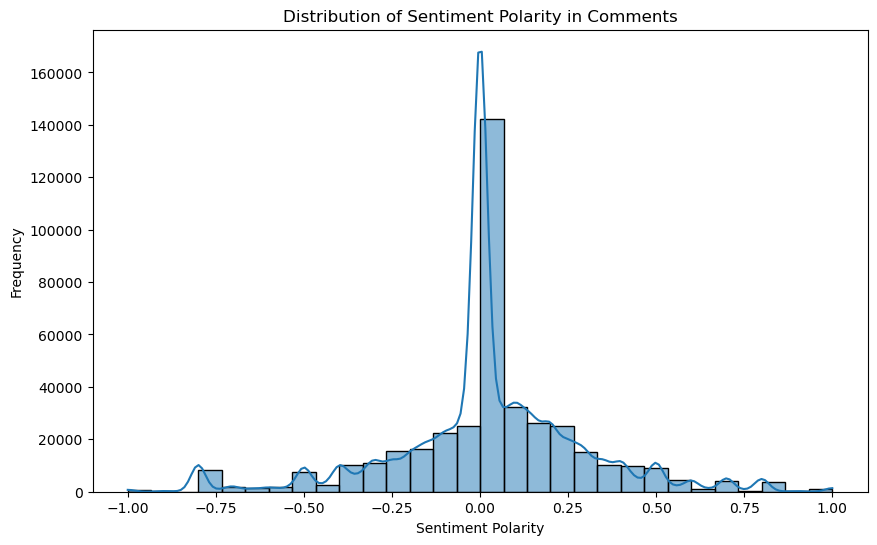

In [54]:
# Function to get sentiment polarity of a text
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to tweets
df['sentiment_polarity'] = df['processed_comment_text'].apply(get_sentiment)

# Plot the distribution of sentiment polarity
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_polarity'], bins=30, kde=True)
plt.title('Distribution of Sentiment Polarity in Comments')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Model Training and Evaluation

In [55]:
# Handle missing values in the 'comment' column
df['processed_comment_text'].fillna('', inplace=True)

# Drop rows with missing labels
df.dropna(subset=['label'], inplace=True)

# TF-IDF Features-F1
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf_df_comment = tfidf_vectorizer.fit_transform(df['processed_comment_text'])


Logistic Regression

In [56]:
# Logistic Regression
X = tfidf_df_comment
y = df['label'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
#Train Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [58]:
y_pred_logistic = logistic_model.predict(X_test_scaled)

In [59]:
acc_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

In [60]:
print("Logistic Regression Report:")
print(report_logistic)
print("Accuracy of Logistic Regression: ", acc_logistic)

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     49632
           1       0.86      0.79      0.83     32138

    accuracy                           0.87     81770
   macro avg       0.87      0.86      0.86     81770
weighted avg       0.87      0.87      0.87     81770

Accuracy of Logistic Regression:  0.8688883453589336


Naive Bayes

In [61]:
# Train Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [62]:
y_pred_nb = naive_bayes_model.predict(X_test)

In [63]:
acc_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

In [64]:
print("Naive Bayes Report:")
print(report_nb)
print("Accuracy of Naive Bayes: ", acc_nb)

Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86     49632
           1       0.82      0.68      0.74     32138

    accuracy                           0.82     81770
   macro avg       0.82      0.79      0.80     81770
weighted avg       0.82      0.82      0.81     81770

Accuracy of Naive Bayes:  0.8158004158004158


SVM (Support Vector Machine)

In [65]:
# Train Support Vector Machine (SVM) model
svm = LinearSVC(random_state=42)
svm.fit(X_train_scaled, y_train)

/Users/saurabhborsiwala/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [66]:
y_pred_svm = svm.predict(X_test_scaled)

In [67]:
acc_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

In [68]:
print("SVM Report:")
print(report_svm)
print("Accuracy of SVM: ", acc_svm)

SVM Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     49632
           1       0.74      0.73      0.74     32138

    accuracy                           0.79     81770
   macro avg       0.78      0.78      0.78     81770
weighted avg       0.79      0.79      0.79     81770

Accuracy of SVM:  0.7930169988993518


Tensorflow Sequential NN Model

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [70]:
model = Sequential() # Initialize a sequential model
# Add a densely-connected neural network layer with 256 neurons and ReLU activation function.
# Specify the input shape based on the number of features in the input data.
model.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5)) # Add a dropout layer with a dropout rate of 0.5 to prevent overfitting.
model.add(Dense(128, activation='relu')) # Add another densely-connected neural network layer with 128 neurons and ReLU activation function.
model.add(Dropout(0.5)) # Add another dropout layer with a dropout rate of 0.5.
model.add(Dense(1, activation='sigmoid')) # Add the output layer with a single neuron and sigmoid activation function for binary classification.

In [104]:
# # Compile the model
model.compile(optimizer= Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
model.fit(X_train_scaled.toarray(), y_train, epochs=10, batch_size=64, validation_data=(X_test_scaled.toarray(), y_test))

Epoch 1/10
5111/5111 [==============================] - 58s 11ms/step - loss: 0.6330 - accuracy: 0.6188 - val_loss: 0.5645 - val_accuracy: 0.7235
Epoch 2/10
5111/5111 [==============================] - 66s 13ms/step - loss: 0.5875 - accuracy: 0.6860 - val_loss: 0.5044 - val_accuracy: 0.7746
Epoch 3/10
5111/5111 [==============================] - 64s 13ms/step - loss: 0.5500 - accuracy: 0.7289 - val_loss: 0.4796 - val_accuracy: 0.7969
Epoch 4/10
5111/5111 [==============================] - 63s 12ms/step - loss: 0.5187 - accuracy: 0.7553 - val_loss: 0.4537 - val_accuracy: 0.8113
Epoch 5/10
5111/5111 [==============================] - 67s 13ms/step - loss: 0.4936 - accuracy: 0.7759 - val_loss: 0.4510 - val_accuracy: 0.8170
Epoch 6/10
5111/5111 [==============================] - 66s 13ms/step - loss: 0.4692 - accuracy: 0.7932 - val_loss: 0.4504 - val_accuracy: 0.8174
Epoch 7/10
5111/5111 [==============================] - 65s 13ms/step - loss: 0.4460 - accuracy: 0.8081 - val_loss: 0.4480 -

In [105]:
y_pred_seq = (model.predict(X_test_scaled.toarray())> 0.53).astype("int32")

In [106]:
acc_seq = accuracy_score(np.array(y_test), y_pred_seq)
report_seq = classification_report(np.array(y_test), y_pred_seq)

In [107]:
print("Sequential NN Report:")
print(report_seq)
print("Tensorflow Sequential NN: ", acc_seq)

Sequential NN Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     49632
           1       0.80      0.79      0.80     32138

    accuracy                           0.84     81770
   macro avg       0.83      0.83      0.83     81770
weighted avg       0.84      0.84      0.84     81770

Tensorflow Sequential NN:  0.8395866454689984


# Model Evaluation

Text(0.5, 1.0, 'Logistic Regression')

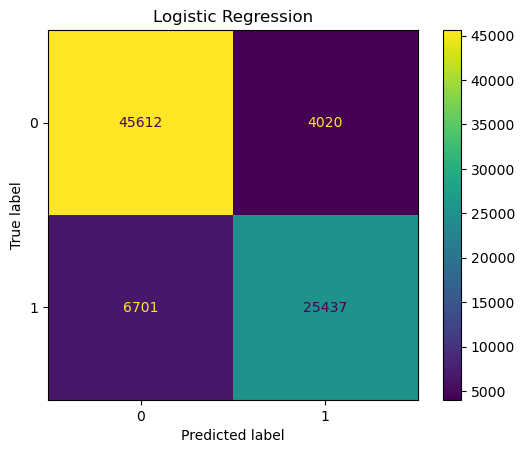

In [108]:
# Plot the confusion matrix
logistic_cm = confusion_matrix(y_test, y_pred_logistic)
ConfusionMatrixDisplay(confusion_matrix=logistic_cm, display_labels=logistic_model.classes_).plot();
plt.title('Logistic Regression')

Text(0.5, 1.0, 'Naive Bayes')

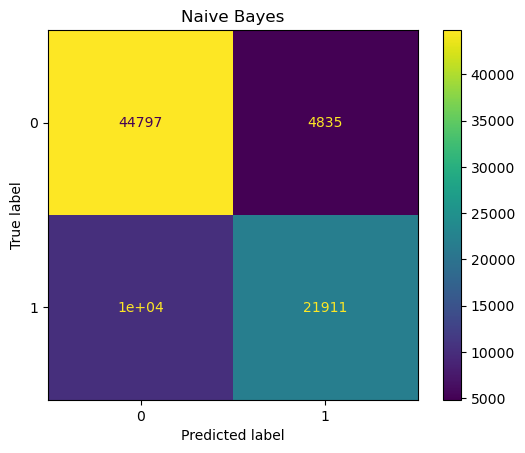

In [109]:
# Plot the confusion matrix
nb_cm = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=naive_bayes_model.classes_).plot();
plt.title('Naive Bayes')

Text(0.5, 1.0, 'SVM Model')

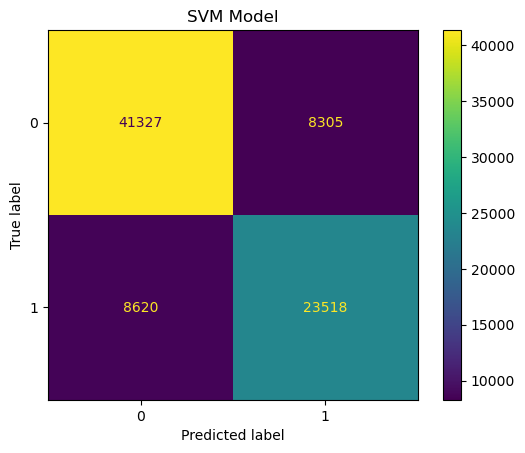

In [110]:
# Plot the confusion matrix
svm_cm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=svm.classes_).plot();
plt.title('SVM Model')

Text(0.5, 1.0, 'Tenforflow Sequential NN Model')

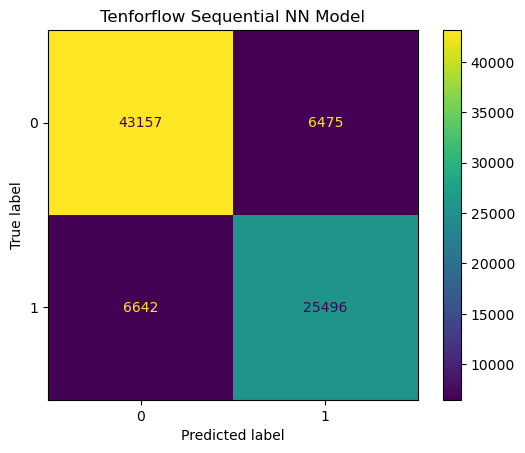

In [111]:
# Plot the confusion matrix
seq_cm = confusion_matrix(y_test, y_pred_seq)
ConfusionMatrixDisplay(confusion_matrix=seq_cm).plot();
plt.title('Tenforflow Sequential NN Model')

In [112]:
# Function to plot ROC curve for a binary classification model
def plot_roc_curve(model, X_test, y_test, model_name):
    try:
        y_score = model.decision_function(X_test)
    except AttributeError:
        try:
            # For models like MultinomialNB that don't have decision_function
            y_score = model.predict_proba(X_test)[:, 1]  # Use the probability of the positive class
        except AttributeError:
            # For Sequential models or others that don't have decision_function or predict_proba
            y_score = model.predict(X_test)  # Use the predicted labels directly

    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=[0, 1])

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test_bin, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(10, 7))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

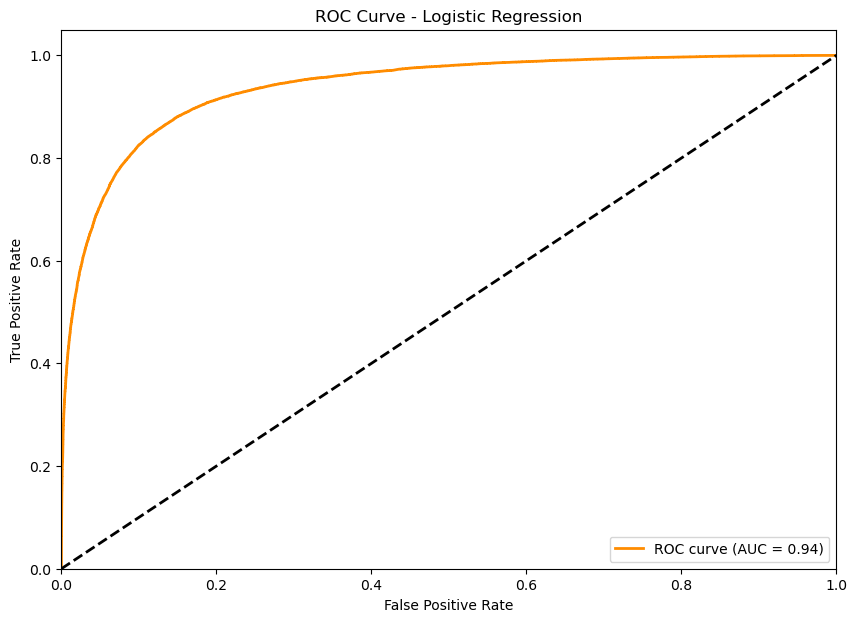

In [113]:
# Plot ROC curve for Logistic Regression
plot_roc_curve(logistic_model, X_test_scaled, y_test, model_name='Logistic Regression')

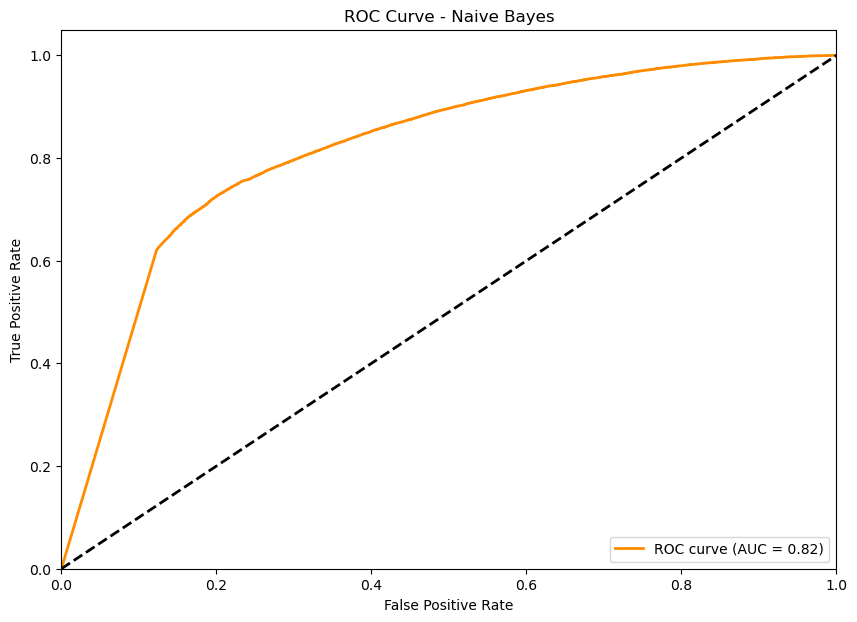

In [114]:
# Plot ROC curve for Naive Bayes
plot_roc_curve(naive_bayes_model, X_test_scaled, y_test, model_name='Naive Bayes')

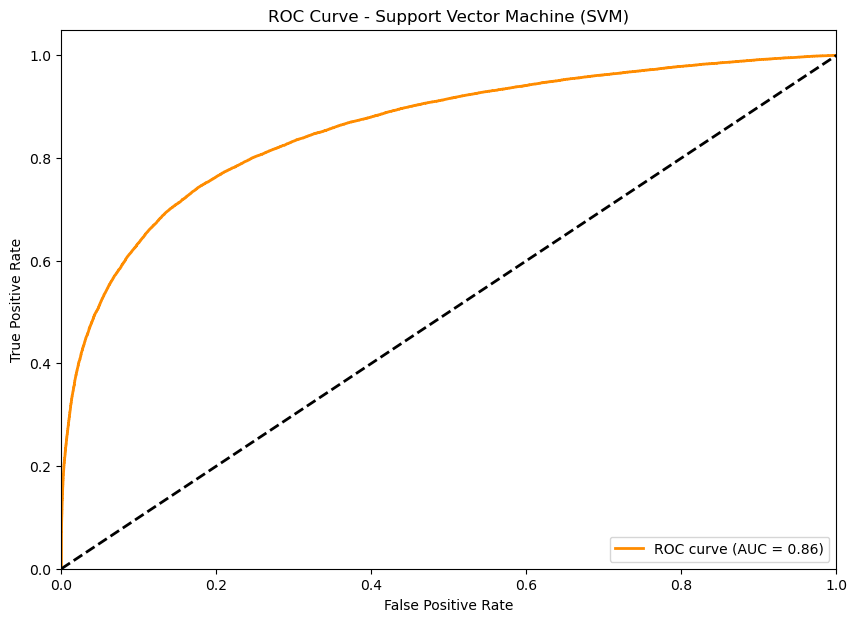

In [115]:
# Plot ROC curve for SVM
plot_roc_curve(svm, X_test_scaled, y_test, model_name='Support Vector Machine (SVM)')

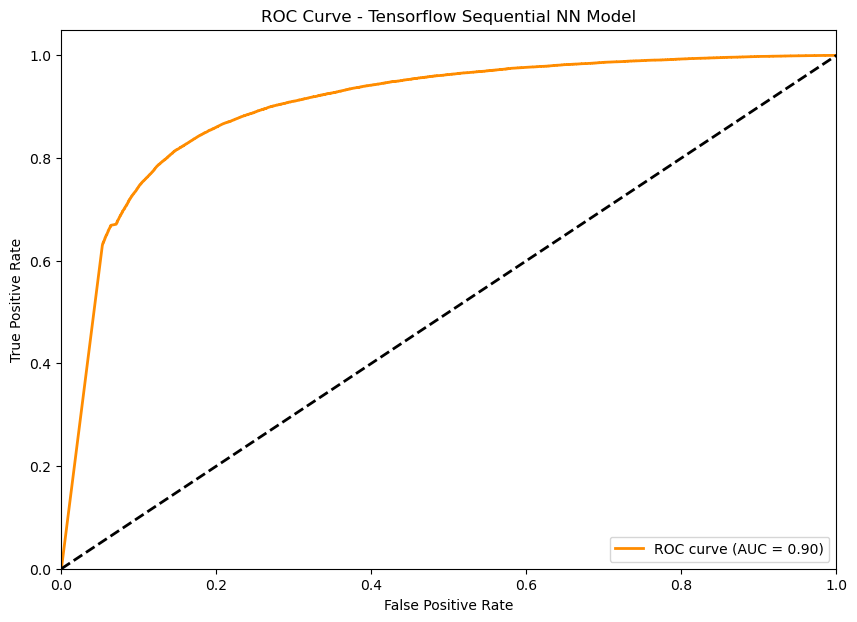

In [116]:
# Plot ROC curve for NN.
plot_roc_curve(model, X_test_scaled.toarray(), np.array(y_test), model_name='Tensorflow Sequential NN Model')

# Feature Engineering

Sentiment analysis using TextBlob, to extract sentiment polarity scores as features

In [117]:
# Sentiment Analysis using TextBlob and adding polarity scores as features
# Function to get sentiment polarity of a text
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to tweets
df['sentiment_polarity'] = df['processed_comment_text'].apply(get_sentiment)
print(df['sentiment_polarity'])

0         0.200000
1         0.000000
2         0.000000
3         0.500000
4         0.800000
            ...   
408842   -0.405000
408843    0.000000
408844   -0.300000
408845   -0.029697
408846    0.061905
Name: sentiment_polarity, Length: 408847, dtype: float64


In [118]:
# Batch processing parameters
batch_size = 1000

# Initialize an empty matrix for the combined features
X_combined = None

# Iterate through batches for TF-IDF vectorization and combining features
for i in range(0, len(df['processed_comment_text']), batch_size):
    X_batch_text = df['processed_comment_text'].iloc[i:i + batch_size]
    X_batch_tfidf = tfidf_vectorizer.transform(X_batch_text)

    # Sentiment polarity features for the current batch
    sentiment_polarity_batch = df['sentiment_polarity'].iloc[i:i + batch_size].values.reshape(-1, 1)

    # Combine TF-IDF features with sentiment polarity scores using a sparse matrix
    X_batch_combined = hstack([X_batch_tfidf, csr_matrix(sentiment_polarity_batch)])

    # Stack batches vertically
    if X_combined is None:
        X_combined = X_batch_combined
    else:
        X_combined = vstack([X_combined, X_batch_combined])

In [119]:
# Split the combined features into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, y, random_state=42, test_size=0.2)

In [120]:
# Scale the combined features
scaler_combined = StandardScaler(with_mean=False)
X_train_combined_scaled = scaler_combined.fit_transform(X_train_combined)
X_test_combined_scaled = scaler_combined.transform(X_test_combined)

Logistic Regression with TFIDF and Sentiment Polarity Features:

In [121]:
#Train Logistic Regression Model
logistic_combined_model = LogisticRegression(max_iter=1000)
logistic_combined_model.fit(X_train_combined_scaled, y_train_combined)

LogisticRegression(max_iter=1000)

In [122]:
y_pred_combined_logistic = logistic_combined_model.predict(X_test_combined_scaled)

In [123]:
acc_combined_logistic = accuracy_score(y_test_combined, y_pred_combined_logistic)
report_combined_logistic = classification_report(y_test_combined, y_pred_combined_logistic)

In [124]:
print("Logistic Regression Report:")
print(report_combined_logistic)
print("Accuracy of Logistic Regression: ", acc_combined_logistic)

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     49632
           1       0.86      0.79      0.83     32138

    accuracy                           0.87     81770
   macro avg       0.87      0.86      0.86     81770
weighted avg       0.87      0.87      0.87     81770

Accuracy of Logistic Regression:  0.8687905099669806


SVM (Super Vector Machine) Model with TFIDF and Sentiment Polarity Features:

In [125]:
# Train Support Vector Machine (SVM) model
svm_combined = LinearSVC(random_state=43)
svm_combined.fit(X_train_combined_scaled, y_train_combined)

/Users/saurabhborsiwala/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=43)

In [126]:
y_pred_svm_combined = svm_combined.predict(X_test_combined_scaled)

In [127]:
acc_svm_combined = accuracy_score(y_test_combined, y_pred_svm_combined)
report_svm_combined = classification_report(y_test_combined, y_pred_svm_combined)

In [128]:
print("SVM Report:")
print(report_svm_combined)
print("Accuracy of SVM: ", acc_svm_combined)

SVM Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84     49632
           1       0.75      0.73      0.74     32138

    accuracy                           0.80     81770
   macro avg       0.79      0.79      0.79     81770
weighted avg       0.80      0.80      0.80     81770

Accuracy of SVM:  0.7988871224165341


Naive Bayes Model with TFIDF and Sentiment Polarity Features:

In [129]:
from sklearn.preprocessing import MinMaxScaler

from scipy.sparse import hstack, csr_matrix, vstack

# Batch processing parameters
batch_size = 1000

# Initialize an empty matrix for the combined features
X_combined = None

# Again batch processing to combine the features as for Naive Bayes,
# Negative values of sentinment polarity needs to be scaled to non-negative values.
# Iterate through batches for TF-IDF vectorization and combining features
for i in range(0, len(df['processed_comment_text']), batch_size):
    X_batch_text = df['processed_comment_text'].iloc[i:i + batch_size]
    X_batch_tfidf = tfidf_vectorizer.transform(X_batch_text)

    # Sentiment polarity features for the current batch
    sentiment_polarity_batch = df['sentiment_polarity'].iloc[i:i + batch_size].values.reshape(-1, 1)

    # Scale and shift sentiment polarity to be non-negative
    sentiment_polarity_scaled = MinMaxScaler().fit_transform(sentiment_polarity_batch)

    # Combine TF-IDF features with sentiment polarity scores using a sparse matrix
    X_batch_combined = hstack([X_batch_tfidf, csr_matrix(sentiment_polarity_scaled)])

    # Stack batches vertically
    if X_combined is None:
        X_combined = X_batch_combined
    else:
        X_combined = vstack([X_combined, X_batch_combined])

# Split the combined features into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, y, random_state=42, test_size=0.2)

# Scale the combined features
scaler_combined = StandardScaler(with_mean=False)
X_train_combined_scaled = scaler_combined.fit_transform(X_train_combined)
X_test_combined_scaled = scaler_combined.transform(X_test_combined)

In [130]:
# Train Naive Bayes Model
naive_bayes_combined_model = MultinomialNB()
naive_bayes_combined_model.fit(X_train_combined_scaled, y_train_combined)

MultinomialNB()

In [131]:
y_pred_nb_combined = naive_bayes_combined_model.predict(X_test_combined)

In [132]:
acc_nb_combined = accuracy_score(y_test_combined, y_pred_nb_combined)
report_nb_combined = classification_report(y_test_combined, y_pred_nb_combined)

In [133]:
print("Naive Bayes Report:")
print(report_nb_combined)
print("Accuracy of Naive Bayes: ", acc_nb_combined)

Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86     49632
           1       0.80      0.73      0.76     32138

    accuracy                           0.82     81770
   macro avg       0.82      0.80      0.81     81770
weighted avg       0.82      0.82      0.82     81770

Accuracy of Naive Bayes:  0.8206799559740736


Tensorflow Sequential NN Model with TFIDF and Sentiment Polarity Features:

In [134]:
model_combined = Sequential() # Initialize a sequential model
# Add a densely-connected neural network layer with 256 neurons and ReLU activation function.
# Specify the input shape based on the number of features in the input data.
model_combined.add(Dense(256, activation='relu', input_shape=(X_train_combined_scaled.shape[1],)))
model_combined.add(Dropout(0.5)) # Add a dropout layer with a dropout rate of 0.5 to prevent overfitting.
model_combined.add(Dense(128, activation='relu')) # Add another densely-connected neural network layer with 128 neurons and ReLU activation function.
model_combined.add(Dropout(0.5)) # Add another dropout layer with a dropout rate of 0.5.
model_combined.add(Dense(1, activation='sigmoid')) # Add the output layer with a single neuron and sigmoid activation function for binary classification.

Use Doc2Vec to embed the processed tweets into vectors and Combine all the features

In [135]:
# Tokenize the processed tweets
tokenized_comments = df['processed_comment_text'].apply(lambda x: x.split())

# Create TaggedDocuments for Doc2Vec training
tagged_data = [TaggedDocument(words=words, tags=[str(i)]) for i, words in enumerate(tokenized_comments)]

In [136]:
# Initialize and train the Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=10)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

In [137]:
# Function to get Doc2Vec vectors for a given set of words
def get_doc2vec_vector(words):
    return doc2vec_model.infer_vector(words)

In [138]:
# Add Doc2Vec vector columns to the dataset
df['doc2vec'] = tokenized_comments.apply(get_doc2vec_vector)

Combining all the features (TFIDF Vectorization, ) using batch processing to make it more memory efficient

In [139]:
# Batch processing parameters
batch_size = 1000

# Initialize an empty matrix for the combined features
X_combined_all = None

# Iterate through batches for TF-IDF vectorization and combining features
for i in range(0, len(df['processed_comment_text']), batch_size):
    X_batch_text = df['processed_comment_text'].iloc[i:i + batch_size]
    X_batch_tfidf = tfidf_vectorizer.transform(X_batch_text)

    # Sentiment polarity features for the current batch
    sentiment_polarity_batch = df['sentiment_polarity'].iloc[i:i + batch_size].values.reshape(-1, 1)

    # Doc2Vec vectors for the current batch
    doc2vec_vectors_batch = np.vstack(df['doc2vec'].iloc[i:i + batch_size].to_numpy())

    # Combine TF-IDF features with sentiment polarity scores and Doc2Vec vectors using a sparse matrix
    X_batch_combined = hstack([X_batch_tfidf, csr_matrix(sentiment_polarity_batch), csr_matrix(doc2vec_vectors_batch)])

    # Stack batches vertically
    if X_combined_all is None:
        X_combined_all = X_batch_combined
    else:
        X_combined_all = vstack([X_combined_all, X_batch_combined])

In [140]:
# Split the combined features into training and testing sets
X_train_combined_all, X_test_combined_all, y_train_combined_all, y_test_combined_all = train_test_split(
    X_combined_all, y, random_state=42, test_size=0.2)

In [141]:
# Scale the combined features
scaler_combined_all = StandardScaler(with_mean=False)
X_train_combined_all_scaled = scaler_combined_all.fit_transform(X_train_combined_all)
X_test_combined_all_scaled = scaler_combined_all.transform(X_test_combined_all)

Logistic Regression with all the combined features

In [142]:
#Train Logistic Regression Model
logistic_combined_all_model = LogisticRegression(max_iter=1000)
logistic_combined_all_model.fit(X_train_combined_all_scaled, y_train_combined_all)

LogisticRegression(max_iter=1000)

In [143]:
y_pred_combined_all_logistic = logistic_combined_all_model.predict(X_test_combined_all_scaled)

In [144]:
acc_combined_all_logistic = accuracy_score(y_test_combined_all, y_pred_combined_all_logistic)
report_combined_all_logistic = classification_report(y_test_combined_all, y_pred_combined_all_logistic)

In [145]:
print("Logistic Regression Report:")
print(report_combined_all_logistic)
print("Accuracy of Logistic Regression: ", acc_combined_all_logistic)

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     49632
           1       0.86      0.79      0.83     32138

    accuracy                           0.87     81770
   macro avg       0.87      0.86      0.86     81770
weighted avg       0.87      0.87      0.87     81770

Accuracy of Logistic Regression:  0.8696221107985814


SVM model with all the features combined

In [146]:
# Train Support Vector Machine (SVM) model
svm_combined_all = LinearSVC(random_state=43)
svm_combined_all.fit(X_train_combined_all_scaled, y_train_combined_all)

/Users/saurabhborsiwala/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=43)

In [147]:
y_pred_svm_combined_all = svm_combined_all.predict(X_test_combined_all_scaled)

In [148]:
acc_svm_combined_all = accuracy_score(y_test_combined_all, y_pred_svm_combined_all)
report_svm_combined_all = classification_report(y_test_combined_all, y_pred_svm_combined_all)

In [149]:
print("SVM Report:")
print(report_svm_combined_all)
print("Accuracy of SVM: ", acc_svm_combined_all)

SVM Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83     49632
           1       0.73      0.75      0.74     32138

    accuracy                           0.79     81770
   macro avg       0.78      0.78      0.78     81770
weighted avg       0.79      0.79      0.79     81770

Accuracy of SVM:  0.7916595328360034


Naive Bayes with all the features combined.

In [150]:
# Batch processing parameters
batch_size = 1000

# Initialize an empty matrix for the combined features
X_combined_all = None

# Again batch processing to combine the features as for Naive Bayes,
# Negative values of sentinment polarity and doc2vec needs to be scaled to non-negative values.
# Iterate through batches for TF-IDF vectorization and combining features
for i in range(0, len(df['processed_comment_text']), batch_size):
    X_batch_text = df['processed_comment_text'].iloc[i:i + batch_size]
    X_batch_tfidf = tfidf_vectorizer.transform(X_batch_text)

    # Sentiment polarity features for the current batch
    sentiment_polarity_batch = df['sentiment_polarity'].iloc[i:i + batch_size].values.reshape(-1, 1)

    # Scale and shift sentiment polarity to be non-negative
    sentiment_polarity_scaled = MinMaxScaler().fit_transform(sentiment_polarity_batch)

    # Doc2Vec vectors for the current batch
    doc2vec_vectors_batch = np.vstack(df['doc2vec'].iloc[i:i + batch_size].to_numpy())

    doc2vec_vectors_scaled = MinMaxScaler().fit_transform(doc2vec_vectors_batch)

    # Combine TF-IDF features with sentiment polarity scores and Doc2Vec vectors using a sparse matrix
    X_batch_combined = hstack([X_batch_tfidf, csr_matrix(sentiment_polarity_scaled), csr_matrix(doc2vec_vectors_scaled)])

    # Stack batches vertically
    if X_combined_all is None:
        X_combined_all = X_batch_combined
    else:
        X_combined_all = vstack([X_combined_all, X_batch_combined])

# Again Split the combined features into training and testing sets
X_train_combined_all, X_test_combined_all, y_train_combined_all, y_test_combined_all = train_test_split(
    X_combined_all, y, random_state=42, test_size=0.2)
# Scale the combined features
scaler_combined_all = StandardScaler(with_mean=False)
X_train_combined_all_scaled = scaler_combined_all.fit_transform(X_train_combined_all)
X_test_combined_all_scaled = scaler_combined_all.transform(X_test_combined_all)

In [151]:
# Train Naive Bayes Model
naive_bayes_combined_all_model = MultinomialNB()
naive_bayes_combined_all_model.fit(X_train_combined_all_scaled, y_train_combined_all)

MultinomialNB()

In [152]:
y_pred_nb_combined_all = naive_bayes_combined_all_model.predict(X_test_combined_all)

In [153]:
acc_nb_combined_all = accuracy_score(y_test_combined_all, y_pred_nb_combined_all)
report_nb_combined_all = classification_report(y_test_combined_all, y_pred_nb_combined_all)

After combining all the features, Naive Bayes performed very poorly compared to other models

In [154]:
print("Naive Bayes Report:")
print(report_nb_combined_all)
print("Accuracy of Naive Bayes: ", acc_nb_combined_all)

Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.94      0.39      0.55     49632
           1       0.51      0.96      0.66     32138

    accuracy                           0.61     81770
   macro avg       0.72      0.68      0.61     81770
weighted avg       0.77      0.61      0.59     81770

Accuracy of Naive Bayes:  0.6148098324568912


Comparision of Models:

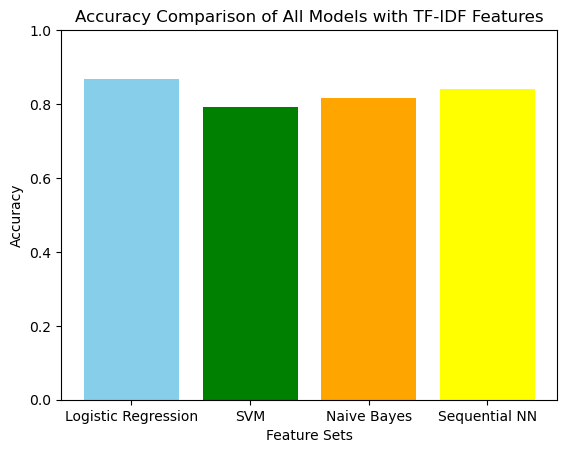

In [155]:
# Plotting for models with TFIDF features
features = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Sequential NN']
accuracies = [acc_logistic, acc_svm, acc_nb, acc_seq]

plt.bar(features, accuracies, color=['skyblue', 'green', 'orange', 'yellow'])
plt.ylim([0, 1])
plt.xlabel('Feature Sets')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of All Models with TF-IDF Features')
plt.show()

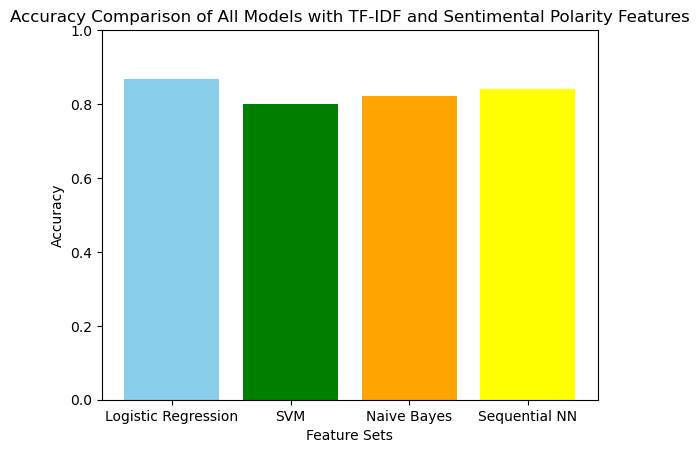

In [156]:
# Plotting for models with TFIDF and Sentimental Polarity features
features = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Sequential NN']
accuracies = [acc_combined_logistic, acc_svm_combined, acc_nb_combined, acc_seq]

plt.bar(features, accuracies, color=['skyblue', 'green', 'orange', 'yellow'])
plt.ylim([0, 1])
plt.xlabel('Feature Sets')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of All Models with TF-IDF and Sentimental Polarity Features')
plt.show()

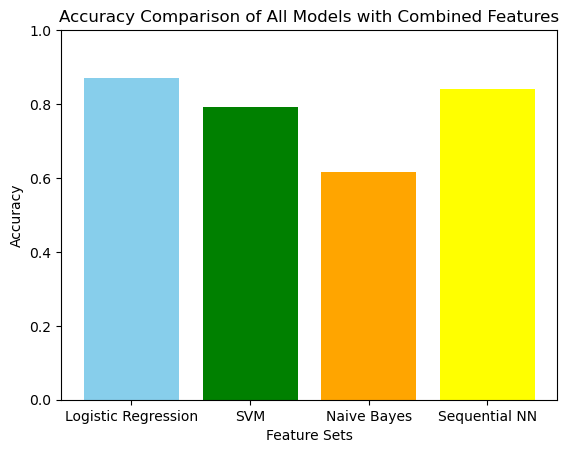

In [157]:
# Plotting for models with combination of all the features.
features = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Sequential NN']
accuracies = [acc_combined_all_logistic, acc_svm_combined_all, acc_nb_combined_all, acc_seq]

plt.bar(features, accuracies, color=['skyblue', 'green', 'orange', 'yellow'])
plt.ylim([0, 1])
plt.xlabel('Feature Sets')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of All Models with Combined Features')
plt.show()